# Dataset Description

This dataset represents the purchase behavior of customers at Spencers’ supermarket. 

Attribute Information:

1.Cust_id – id of customer<br>
2.AVG_Actual_price_12 – MRP<br>
3.Purchase_Value – Total amount of purchase customer has made<br>
4.No_of_Items – Number of items bought<br> 
5.Total_Discount- Discount availed by each customer<br>
6.MONTH_SINCE_LAST_TRANSACTION – Last month of visit in supermarket<br>

__Problem Statement__ Cluster customers into different segments or groups based on the attributes given using clustering algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
custo = pd.read_csv("../Data/Supermarket_Purchase.csv")

In [4]:
custo.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [5]:
custo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


In [6]:
custo.isnull().sum()

Cust_id                         0
AVG_Actual_price_12             0
Purchase_Value                  0
No_of_Items                     0
Total_Discount                  0
MONTH_SINCE_LAST_TRANSACTION    0
dtype: int64

There are 702 rows in the dataset<br/>
All the data types are numeric. <br/>
There is no missing value in dataset

In [7]:
custo.describe()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [8]:
# Renaming column names
custo.rename(columns={"AVG_Actual_price_12" : "MRP", "MONTH_SINCE_LAST_TRANSACTION" : "Recency"}, inplace=True)

In [9]:
# Rounding off to two decimal places
custo["MRP"] = round(custo["MRP"],2)
custo["Purchase_Value"] = round(custo["Purchase_Value"],2)
custo["Total_Discount"] = round(custo["Total_Discount"],2)

In [10]:
custo[custo["Total_Discount"] < 0].shape

(18, 6)

There are 18 rows in dataset whose total discounts are negative. Taking absolute value of this column

In [11]:
custo["Total_Discount"] = abs(custo["Total_Discount"])

In [12]:
custo[custo["Purchase_Value"] < 0].shape
custo[custo["No_of_Items"] < 0].shape
custo[custo["MRP"] < 0].shape

(0, 6)

(0, 6)

(0, 6)

In [13]:
custo[custo["Purchase_Value"] - custo["Total_Discount"] < 0].shape

(210, 6)

There are many rows in dataset where discount amount greater than purchase value<br/>
Deleting these rows from dataset

In [14]:
custo.drop(custo[custo["Purchase_Value"] - custo["Total_Discount"] < 0].index, inplace=True)
custo.reset_index(drop=True, inplace=True)

In [15]:
custo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
Cust_id           492 non-null int64
MRP               492 non-null float64
Purchase_Value    492 non-null float64
No_of_Items       492 non-null int64
Total_Discount    492 non-null float64
Recency           492 non-null int64
dtypes: float64(3), int64(3)
memory usage: 23.2 KB


#### Function to calculate actual purchase value

In [16]:
def cal_actual_purchased_val(params):
    mrp = params[0]
    qty = params[1]
    discount = params[2]
    act_purchased_val = round((mrp*qty - discount),2)
    return act_purchased_val

In [17]:
custo["Actual_Price"] = custo[["MRP", "No_of_Items", "Total_Discount"]].apply(lambda x: cal_actual_purchased_val(x), axis=1)

In [18]:
custo.head()

,Cust_id,MRP,Purchase_Value,No_of_Items,Total_Discount,Recency,Actual_Price
0,1,300.00,1200.0,4,0.0,11,1200.00
1,4,3510.00,7020.0,2,780.0,4,6240.00
2,8,4530.00,13590.0,3,1510.0,1,12080.00
3,9,2428.08,33455.0,15,17445.0,6,18976.20
4,12,2257.92,37265.0,17,15330.0,3,23054.64


In [19]:
custo_df = pd.DataFrame(custo)

In [20]:
custo_df = custo_df[["MRP", "No_of_Items", "Total_Discount", "Actual_Price", "Recency"]]

In [21]:
custo_df.head()

,MRP,No_of_Items,Total_Discount,Actual_Price,Recency
0,300.00,4,0.0,1200.00,11
1,3510.00,2,780.0,6240.00,4
2,4530.00,3,1510.0,12080.00,1
3,2428.08,15,17445.0,18976.20,6
4,2257.92,17,15330.0,23054.64,3


#### Scaling the data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mscaler = MinMaxScaler(feature_range=(0, 1))
X = mscaler.fit_transform(custo_df)
X

array([[0.02512563, 0.01960784, 0.        , 0.03569385, 0.90909091],
       [0.34773869, 0.00653595, 0.00458284, 0.06254086, 0.27272727],
       [0.45025126, 0.0130719 , 0.00887192, 0.09364931, 0.        ],
       ...,
       [0.02985327, 0.00653595, 0.00355999, 0.02977137, 1.        ],
       [0.3718593 , 0.        , 0.0220329 , 0.0293017 , 1.        ],
       [0.4120603 , 0.        , 0.02438308, 0.0293017 , 1.        ]])

#### Identify optimal number of clusters using Elbow method 

In [25]:
from sklearn.cluster import KMeans

In [26]:
ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    clusters = KMeans(n_clusters=i, random_state=0)
    clusters.fit(X)
    ssw.append(clusters.inertia_)

clusters
ssw

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[86.09810916708525,
 45.363341071542905,
 36.30311884140138,
 29.852382069139352,
 24.384419754421668,
 21.22736900077784,
 18.80434242438664,
 16.724648868814175,
 14.898428975199504]

In [27]:
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters        SSW
0                1  86.098109
1                2  45.363341
2                3  36.303119
3                4  29.852382
4                5  24.384420
5                6  21.227369
6                7  18.804342
7                8  16.724649
8                9  14.898429


<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Sum Squared Within')

Text(0.5, 1.0, 'Elbow method to find optimal number of clusters')

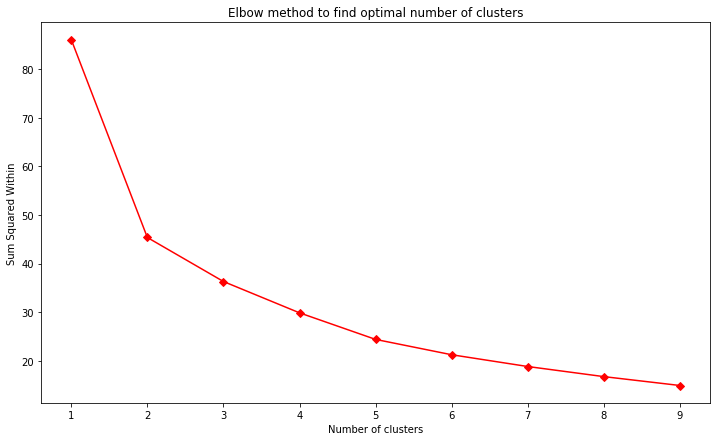

In [28]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "D",color="red")
plt.xlabel("Number of clusters")
plt.ylabel("Sum Squared Within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

##### Number of cluster is 4. After 4th cluster, there is no significant change in ssw

#### Building K Means Model

In [29]:
kmeans=KMeans(n_clusters=4, random_state=0)
km = kmeans.fit(X)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### K Cluster Centers (Centroids)

In [30]:
km.cluster_centers_

array([[0.26638444, 0.02274716, 0.0242031 , 0.06674369, 0.49677881],
       [0.26094564, 0.01253223, 0.00900183, 0.06199794, 0.88573812],
       [0.20974648, 0.08410733, 0.07845505, 0.12415051, 0.10944976],
       [0.577217  , 0.01797386, 0.01068773, 0.12497113, 0.16520979]])

In [31]:
# Doing Inverse transformation on centroids
centroid_df=pd.DataFrame(mscaler.inverse_transform(km.cluster_centers_),columns=custo_df.columns)

In [32]:
centroid_df

,MRP,No_of_Items,Total_Discount,Actual_Price,Recency
0,2700.525197,4.480315,4119.366929,7028.998346,6.464567
1,2646.409083,2.917431,1532.111651,6138.076697,10.743119
2,2136.977500,13.868421,13353.049342,17806.002566,2.203947
3,5793.309135,3.750000,1819.051635,17960.058654,2.817308


First row indicates centroid coordinates of all columns for Cluster 1.<br/>
Second row indicates centroid coordinates of all columns for Cluster 2.<br/>
Similarly, third row for Cluster 3 and so on...

In [33]:
# Cluster vectors - Showing observation belonging which clusters 
cluster_vectors = km.labels_
cluster_vectors

array([1, 0, 3, 0, 2, 1, 0, 3, 3, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3,
       3, 2, 2, 1, 0, 0, 0, 1, 2, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 1,
       2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 3,
       2, 1, 0, 0, 2, 3, 2, 1, 3, 1, 2, 0, 1, 2, 2, 1, 2, 3, 2, 0, 0, 2,
       2, 0, 3, 2, 0, 3, 1, 2, 3, 1, 3, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 3,
       1, 1, 2, 0, 3, 2, 1, 3, 3, 2, 2, 0, 2, 1, 0, 3, 0, 2, 3, 1, 3, 0,
       3, 0, 1, 1, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 3, 2, 1, 2, 1, 3, 2, 0,
       2, 0, 2, 2, 1, 0, 3, 0, 3, 3, 3, 0, 0, 2, 1, 1, 2, 0, 3, 2, 1, 3,
       0, 0, 1, 1, 2, 3, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 3,
       0, 2, 1, 0, 2, 0, 2, 0, 3, 2, 0, 1, 1, 3, 1, 1, 0, 2, 1, 2, 0, 2,
       2, 2, 1, 0, 3, 3, 1, 2, 0, 1, 3, 0, 2, 2, 2, 2, 0, 3, 2, 1, 0, 2,
       0, 3, 2, 2, 2, 3, 3, 3, 0, 2, 2, 2, 0, 1, 0, 0, 3, 3, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 3, 0, 2, 2, 3, 3, 0, 0, 2, 1, 1, 0, 3, 0, 2, 2, 1,
       2, 3, 0, 0, 2, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0,

In [34]:
custo_df["clusters"] = cluster_vectors

In [35]:
custo_df.head()

,MRP,No_of_Items,Total_Discount,Actual_Price,Recency,clusters
0,300.00,4,0.0,1200.00,11,1
1,3510.00,2,780.0,6240.00,4,0
2,4530.00,3,1510.0,12080.00,1,3
3,2428.08,15,17445.0,18976.20,6,0
4,2257.92,17,15330.0,23054.64,3,2


In [36]:
custo_df["clusters"].value_counts()

2    152
0    127
1    109
3    104
Name: clusters, dtype: int64

In [37]:
# Fit the model
y_kmeans = kmeans.fit_predict(X)

### Visualize the Cluster

Text(0.5, 1.0, 'Cluster of MRP for No_of_Items')

Text(0.5, 0, 'MRP')

Text(0, 0.5, 'Number of Items')

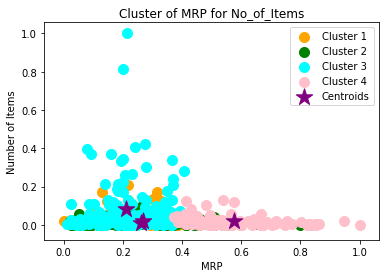

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='orange', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='pink', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='purple', label='Centroids', marker="*")

plt.title('Cluster of MRP for No_of_Items')
plt.xlabel('MRP')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cluster of MRP for Total Discount')

Text(0.5, 0, 'MRP')

Text(0, 0.5, 'Total Discount')

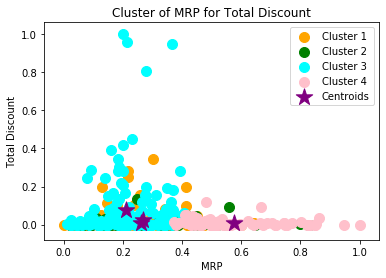

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s=100, c='orange', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s=100, c='cyan', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s=100, c='pink', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=300, c='purple', label='Centroids', marker="*")

plt.title('Cluster of MRP for Total Discount')
plt.xlabel('MRP')
plt.ylabel('Total Discount')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cluster of Total Discount for Actual Price')

Text(0.5, 0, 'Total Discount')

Text(0, 0.5, 'Actual Price')

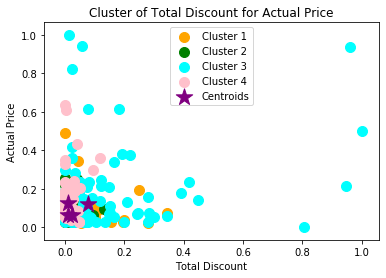

In [42]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='orange', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='cyan', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 3], s=100, c='pink', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=300, c='purple', label='Centroids', marker="*")

plt.title('Cluster of Total Discount for Actual Price')
plt.xlabel('Total Discount')
plt.ylabel('Actual Price')
plt.legend()
plt.show()

Data points are scattered in four clusters.<br/>
The data points in the bottom right belong to items with higher discount.<br/>
The data points in the top left (some are cyan) belong to items with higher purchase values.<br/>
The data points in bottom left region (combination of mostly cyan and pink and less yellow data points) are the ones with average purchase values and average discounts